# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#Functions that find Black-Scholes value of CALL and PUT options

#Call option
def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    Computes the Black-Scholes value of a European call option.
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)

#Put option
def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    Computes the Black-Scholes value of a European put option.
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)




A visual representation of how the Black-Scholes call option price changes with respect to time.

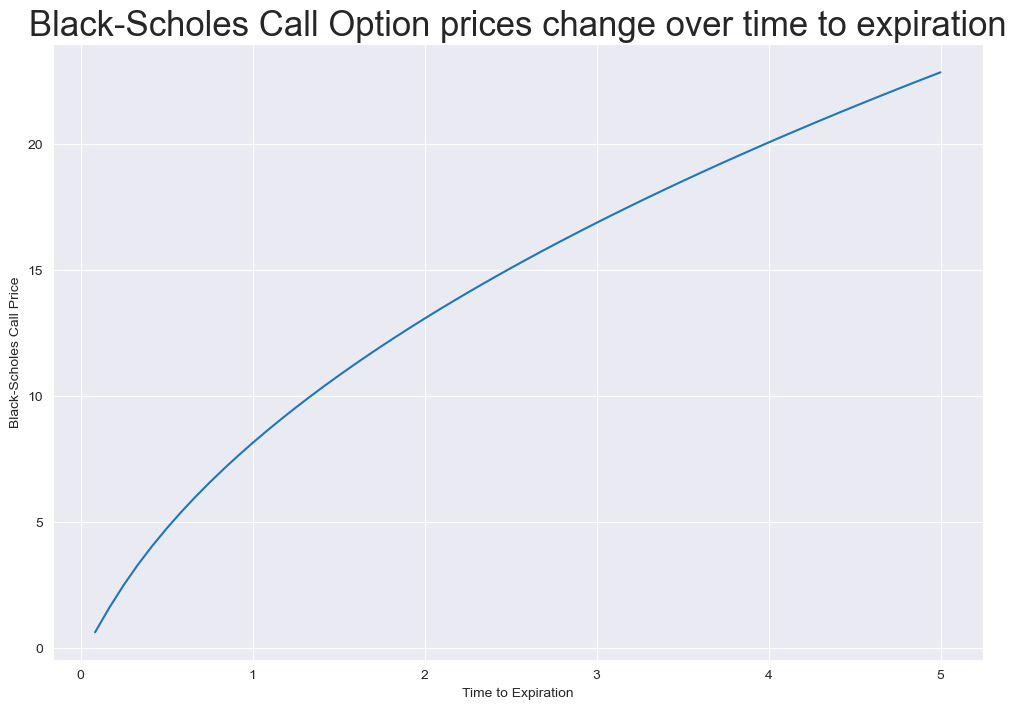

In [10]:
S0 = 100 #Spot price 
K = 110 #Strike Price
sigma = 0.3 #volatility
times = np.linspace(1/12, 5, 60)  # 1 month to 5 years in monthly steps

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

#print(call_prices)

plt.figure(figsize = (12,8))
plt.title('Black-Scholes Call Option prices change over time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

As the "time to expiration" increases, the call option price increases. This is expected: more time = more opportunity for the stock to rise above the strike = higher value. However, the increase is concave — the rate of price increase diminishes over time.

(a) Use the visualization to interpret how the rate of change of the Black-Scholes call option price behaves as time progresses.

### Observations:
## Call Option – Time Sensitivity:

**Interpretation**: Rate of Change of the Black-Scholes Call Option Price Over Time
The Black-Scholes call option price increases as time to expiration increases, This makes sense: the more time you have, the more chances the stock has to move above the strike price, so the option becomes more valuable. 

But this price increase doesn’t happen at a constant rate.

At first, when the option has just a little time left, adding more time makes a big difference in the price.

Later, when the option already has a lot of time left, adding even more time doesn’t increase the price as much.

This means the option price curve rises quickly at first and then slowly flattens out — it’s curved upward but not steep the whole way.




### Exploring the Rate of change of price as time progress
In the previous section, we plotted the **Black-Scholes call option price** as a function of time to expiration. We saw that the call price increases with more time, but at a **slowing rate** — the curve becomes flatter over time.

This behavior is closely related to a key options concept known as **Theta**.

**Theta** measures the **rate of change of an option’s price with respect to time**. It tells us how much the option's price decreases as time passes — all else being equal.

- For most options, **Theta is negative**: the option **loses value over time**.
- This is called **time decay**.
- Theta becomes **more negative as expiration gets closer**, especially for out-of-the-money options.

In the Black-Scholes model, the **Theta for a European call option** is given by the formula:

$\Theta = -\frac{S_0 \sigma \phi(d_1)}{2\sqrt{t}} - rK e^{-rt} \Phi(d_2)$

Where:
- $ S_0 $: Spot price  
- $ K $: strike price  
- $ \sigma $: volatility  
- $ t $: time to expiration  
- $ r $: risk-free interest rate  
- $ \phi(d_1) $: standard normal PDF  
- $ \Phi(d_2) $: standard normal CDF  

By plotting Theta over different times to expiration, we can visualize **how fast** a call option loses value at different points in time.


In the next plot, we show the **Theta of a European call option** as a function of time to expiration.


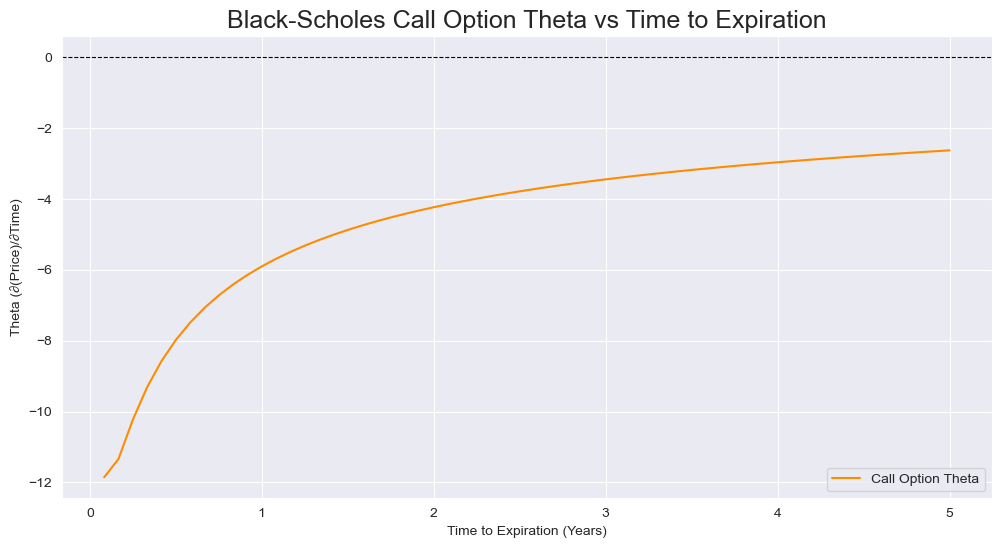

In [12]:
# Analytical Call Theta
def bs_theta_call(S0, K, sigma, t, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    term1 = - (S0 * norm.pdf(d1) * sigma) / (2 * np.sqrt(t))
    term2 = - r * K * np.exp(-r*t) * norm.cdf(d2)
    return term1 + term2  # this is Theta per year

# Compute Theta values
theta_vals = [bs_theta_call(S0, K, sigma, t, r=0) for t in times]

# Plot Theta
plt.figure(figsize=(12, 6))
plt.plot(times, theta_vals, label='Call Option Theta', color='darkorange')
plt.title('Black-Scholes Call Option Theta vs Time to Expiration', fontsize=18)
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Theta (∂(Price)/∂Time)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()

The Theta of a Black-Scholes call option is negative, indicating that the option loses value as time passes. The rate of time decay is steepest for short time to expiration. As time to expiration increases, Theta becomes less negative, meaning that longer-dated options decay more slowly. This behavior captures the accelerating loss of time value as expiration approaches.

(b) Create a separate graphic to visualize how the rate of change of the Black-Scholes call option price depends on the spot price S(0)

### Call Option – Spot Price Sensitivity:

### Visualizing How the Black-Scholes Call Price Responds to Spot Price Changes

In this section, we explore how the **call option price** and its **rate of change** behave as the **spot price $ S(0) $** varies, while keeping other parameters (strike, volatility, time to expiration, and interest rate) fixed.

This sensitivity is captured by the **Delta** of the call option.

**Delta** is a key "Greek" in options pricing. For a European **call option**, Delta measures how much the **option price changes** when the **underlying stock price increases by one unit**:

$\Delta_{\text{call}} = \frac{\partial C}{\partial S_0} = \Phi(d_1)$

Where:
- $ \Phi(d_1) $ is the standard normal cumulative distribution function.

Below we will plot call option prices vs spot prices as well as Delta of this call option vs spot prices to visualize how the rate of change of the Black-Scholes call option price depends on the spot price S(0).

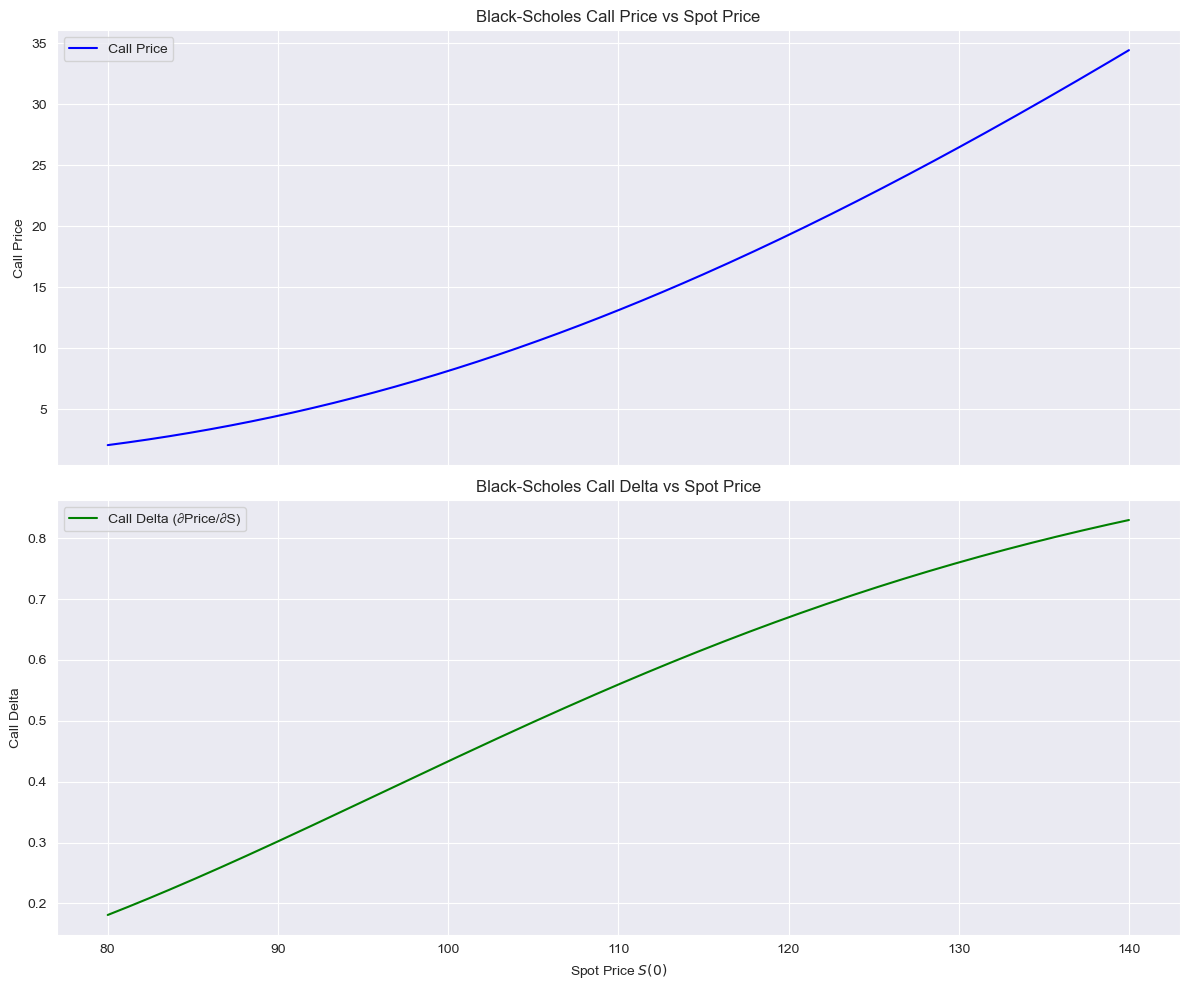

In [13]:
# Parameters
K = 110
sigma = 0.3
t = 1  # 1 year to expiration
r = 0

# Range of Spot Prices
S_vals = np.linspace(80, 140, 200)

# Analytical Call Price and Delta
def d1(S, K, sigma, t, r):
    return (np.log(S/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))

call_prices = []
call_deltas = []

for S in S_vals:
    d1_val = d1(S, K, sigma, t, r)
    price = S * norm.cdf(d1_val) - K * np.exp(-r * t) * norm.cdf(d1_val - sigma * np.sqrt(t))
    delta = norm.cdf(d1_val)
    call_prices.append(price)
    call_deltas.append(delta)


# Plot Call Price and Delta
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

#Call Price vs Spot Price
ax[0].plot(S_vals, call_prices, label='Call Price', color='blue')
ax[0].set_title('Black-Scholes Call Price vs Spot Price')
ax[0].set_ylabel('Call Price')
ax[0].grid(True)
ax[0].legend()

# Analytical Delta vs Spot Price
ax[1].plot(S_vals, call_deltas, label='Call Delta (∂Price/∂S)', color='green')
ax[1].set_title('Black-Scholes Call Delta vs Spot Price')
ax[1].set_xlabel('Spot Price $S(0)$')
ax[1].set_ylabel('Call Delta')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()


### Observation: Call option-Spot Price Sensitivity 
**Top Plot: Call Option Price vs Spot Price**
This shows how the call price increases as the spot price S(0) increases. The curve is upward sloping and convex, meaning: When the stock price is low (below the strike), the call is out-of-the-money, and its price is low. As the stock price approaches and exceeds the strike (K=110), the option becomes more valuable. For high stock prices (deep in-the-money), the call price increases almost linearly with the stock price — it behaves similarly to the underlying stock.

**Bottom Plot: Call Delta vs Spot Price**
This plot shows the rate of change of the call option price with respect to the spot price (i.e., Delta).
Delta increases with the spot price:

When the stock is far below the strike (e.g., S(0)=80), Delta is low (~0.2). The option price is not very sensitive to small moves in the stock.

Near the strike price (around S(0)=110), Delta is about 0.5 — this is typical for at-the-money options.

When the stock is far above the strike (say, S(0)=140), Delta approaches 1.0 — the call option behaves almost like owning the stock itself.


### Analyzing Put Option Price Sensitivities

After studying how the Black-Scholes **call option price** and its rate of change (Theta and Delta) depend on time and spot price, we now repeat the same analysis for **put options**.

#### Black-Scholes put price change with time to expiration:

Similar to call options, **put options gain value with more time to expiration**, especially when they are **out-of-the-money**. However, their behavior is not identical — we'll examine this by plotting the put price over a range of expiration times.

We will also compute **Theta** (∂PutPrice/∂Time) to see how time decay affects put options.



#### Put prices respond to changes in the spot price:

Put options are **more valuable when the spot price is lower**, since they give the right to sell at the strike price. We’ll analyze how **Delta** (∂PutPrice/∂Spot) behaves across different spot prices and compare it to the behavior of call Delta.


In [15]:
# Functions for Put option pricing and Theta
def bs_put(S, K, sigma, t, r=0):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return -S * norm.cdf(-d1) + K * np.exp(-r * t) * norm.cdf(-d2)

def theta_put(S, K, sigma, t, r=0):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    term1 = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(t))
    term2 = + r * K * np.exp(-r*t) * norm.cdf(-d2)
    return term1 + term2

In [16]:
# Parameters
S0 = 100
K = 110
sigma = 0.3
r = 0
times = np.linspace(1/12, 5, 60)


In [17]:
put_prices = [bs_put(S0, K, sigma, t, r) for t in times]
put_thetas = [theta_put(S0, K, sigma, t, r) for t in times]

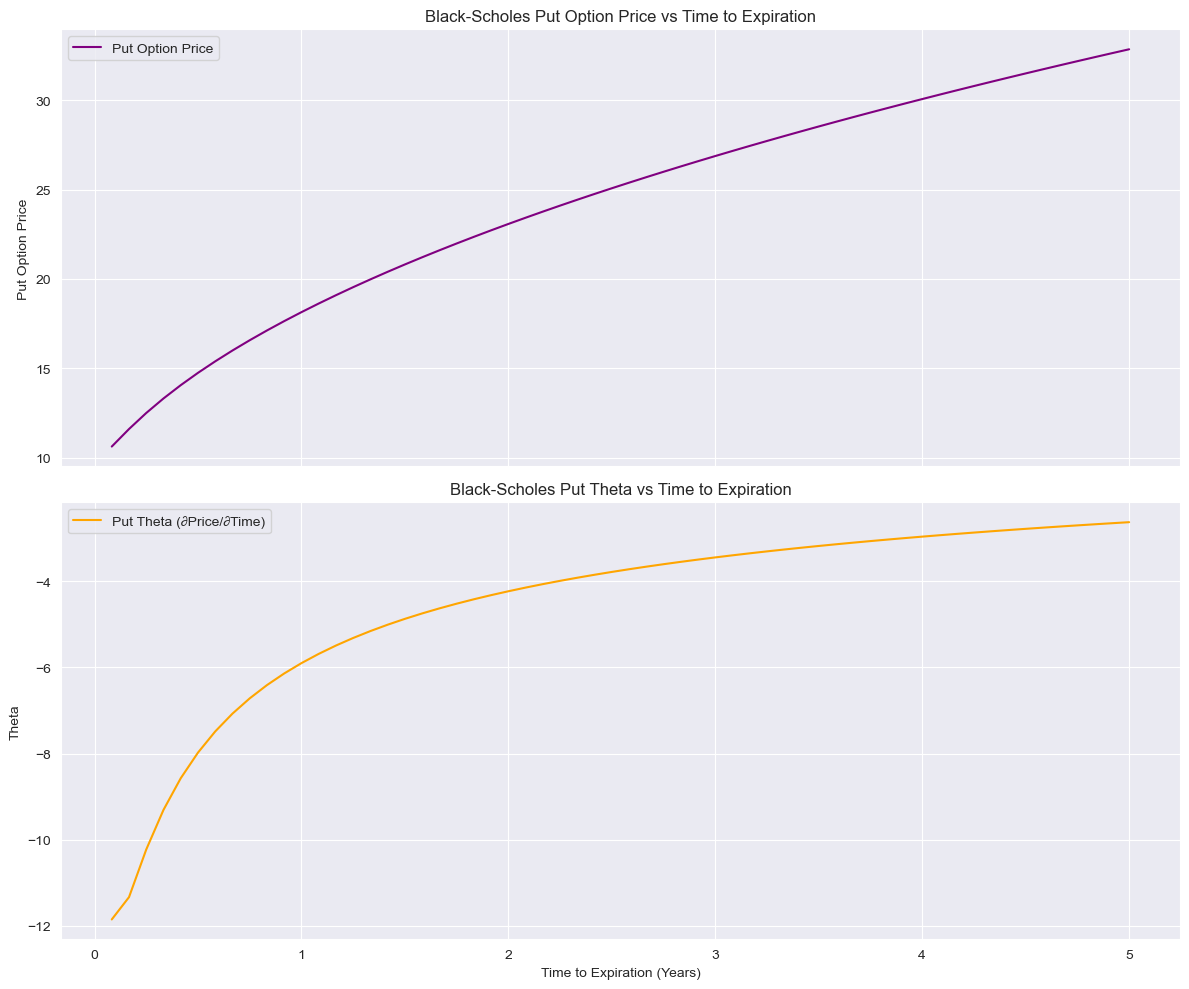

In [18]:
# Plot
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax[0].plot(times, put_prices, label='Put Option Price', color='purple')
ax[0].set_title('Black-Scholes Put Option Price vs Time to Expiration')
ax[0].set_ylabel('Put Option Price')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(times, put_thetas, label='Put Theta (∂Price/∂Time)', color='orange')
ax[1].set_title('Black-Scholes Put Theta vs Time to Expiration')
ax[1].set_xlabel('Time to Expiration (Years)')
ax[1].set_ylabel('Theta')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

### Observations: Put Option – Time Sensitivity:  

**Put Price vs Time to Expiration**
As time to expiration increases, the put option price increases. This happens because:
The longer the time until expiration, the more opportunity the underlying asset has to fall below the strike price. Therefore, the value of having downside protection (a put) increases. However, the curve is concave upward — meaning the rate at which the price increases slows down over time. This reflects the fact that: Time has diminishing marginal value — adding more time increases the price, but each additional year contributes less than the previous one. 

**Put Theta vs Time to Expiration**
The Theta of the put option — which measures how the price changes as time passes — is negative, just like for call options. But here’s what the plot tells us: Theta becomes more negative as expiration gets closer. This reflects faster time decay near the end of the option’s life.
When time to expiration is long, Theta is smaller in magnitude (closer to zero), meaning the put option loses value more slowly over time.
This curve captures the essence of time decay: it is not constant — it accelerates as expiration nears.

*Put Option – Spot Price Sensitivity:*

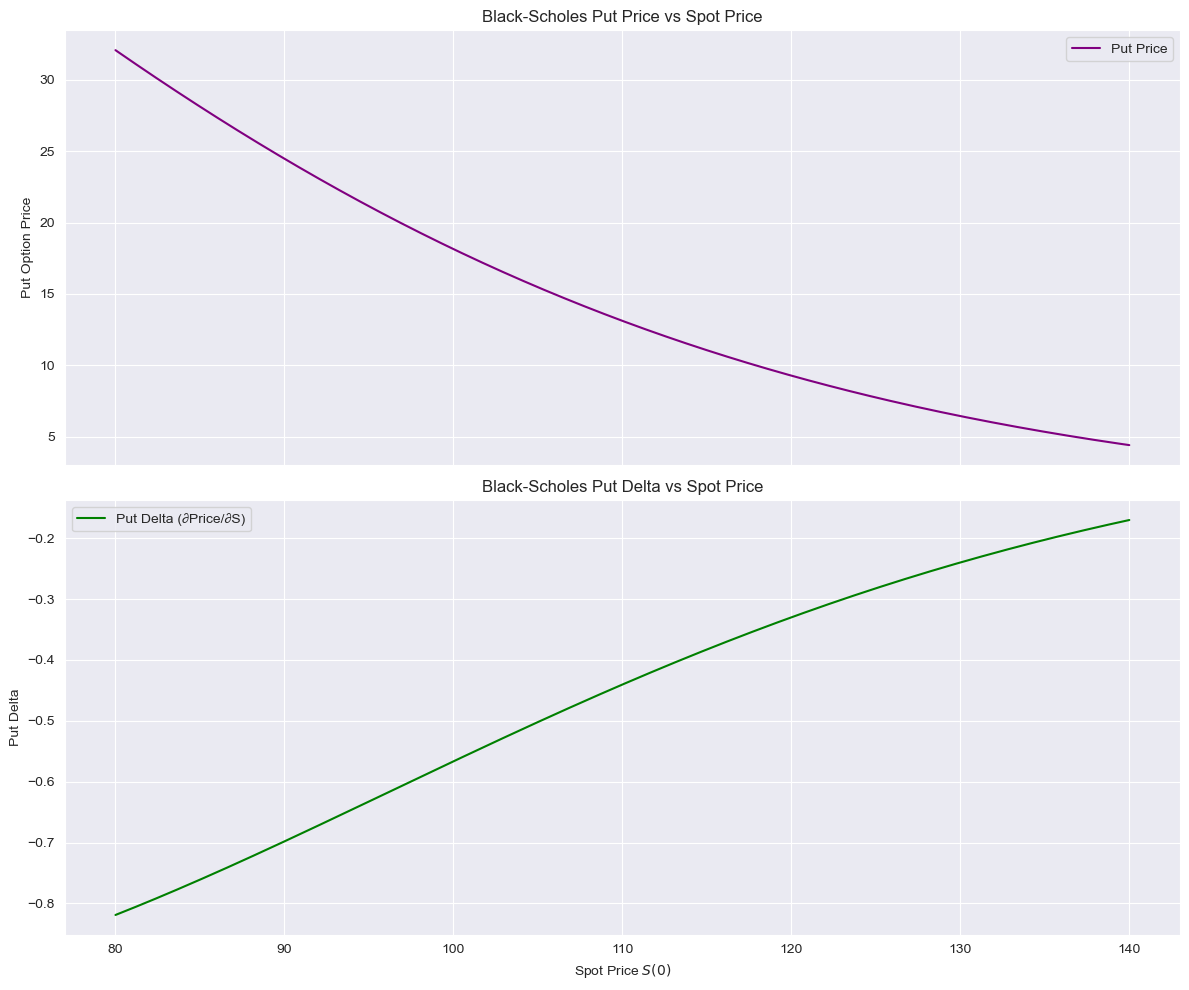

In [19]:
def delta_put(S, K, sigma, t, r=0):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    return norm.cdf(d1) - 1  # analytical Delta for a put

S_vals = np.linspace(80, 140, 200)
put_prices_spot = [bs_put(S, K, sigma, t=1, r=0) for S in S_vals]
put_deltas = [delta_put(S, K, sigma, t=1, r=0) for S in S_vals]

fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax[0].plot(S_vals, put_prices_spot, label='Put Price', color='purple')
ax[0].set_title('Black-Scholes Put Price vs Spot Price')
ax[0].set_ylabel('Put Option Price')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(S_vals, put_deltas, label='Put Delta (∂Price/∂S)', color='green')
ax[1].set_title('Black-Scholes Put Delta vs Spot Price')
ax[1].set_xlabel('Spot Price $S(0)$')
ax[1].set_ylabel('Put Delta')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


#### Observation: Put Option – Spot Price Sensitivity:

**Put Price vs Spot Price**
As the spot price S(0) increases, the put option price decreases. This is expected, because the value of a put option comes from the ability to sell the asset at a fixed strike price K. If the asset’s current market value S(0) is already high, it’s less likely to be profitable to sell it at the lower strike. The curve is downward-sloping and convex, meaning:
When S(0) is low, the put is deep in-the-money and highly valuable.
As S(0) rises, the option loses value quickly at first, then more slowly as it becomes out-of-the-money.

**Put Delta vs Spot Price**
The Delta of the put option tells us how sensitive the option price is to changes in the spot price. Delta is negative for puts, because as the spot price increases, the put price decreases.
When the option is deep in-the-money (low spot price), Delta is close to –1 → the put acts almost like the inverse of the stock.
When the option is at-the-money, Delta is around –0.5.
When the option is deep out-of-the-money (high spot price), Delta approaches 0 → the option barely reacts to changes in stock price.

The Black-Scholes model shows that both call and put option prices are sensitive to time and spot price in nonlinear ways. While call prices increase with spot price and put prices decrease, their respective sensitivities (Delta and Theta) vary depending on moneyness and time to expiration — becoming most pronounced near expiration and around the strike price.